In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# DATA

In [2]:
# GWAS
gwas_output = "./output/bcftools_FLT2_snpEff2_TRAIN_ID_4.assoc.txt"

# Annotations of all variants
path = "/mnt/c/Users/aniaf/Projects/GAPP/DATA/AFR_prediction_albicans/10_variants/"
nice_table = path + "bcftools_FLT2_snpEff2_nice_table.tab"

# Gene names
orf_mapping = "/home/DATA/Candida_albicans_reference/ORF19_Assembly22_mapping.tab"

In [6]:
# Reading datasets
dres = pd.read_csv(gwas_output, sep="\t", header=0)
dres.head()

dmeta = pd.read_csv(nice_table, sep="\t", header=0)
dmeta.head()

dorf = pd.read_csv(orf_mapping, sep="\t", header=0)
dorf['GENE_NAME'] = dorf['GENE_NAME'].fillna('UNK')
dorf['GeneName'] = dorf.apply(lambda x: x['GENE_NAME'] if x['GENE_NAME']!="UNK" else x['ASSEMBLY22_ID'], axis=1)
dorf.head()

dmo = pd.merge(dmeta, dorf, left_on = "ANN_feature", right_on = "ASSEMBLY22_ID", how = 'left')
dmo.head()

# Merging tables
dm = pd.merge(dres, dmo, left_on = ['chr','ps'], right_on = ['#CHROM','POS'], how = 'left')
print(dres.shape, dmo.shape, dm.shape)
dm.head()

dm = dm[dm['chr'] != 'Ca22chrM_C_albicans_SC5314'].reset_index(drop=True)
dm['loc'] = range(len(dm['chr'].values))
dm['p_wald_log'] = dm['p_wald'].apply(lambda x: -1 * np.log10(x))
dm['variant'] = dm.apply(lambda x: x['chr'] + '_' + str(x['ps']), axis=1)
dm.head()

# Getting chromosome coordinates

dchr = dm.groupby(['chr']).agg(max_pos = ('ps','max'),
                               min_loc = ('loc', 'min'),
                               max_loc = ('loc', 'max')).reset_index()
dchr['midloc'] = dchr.apply(lambda x: int(x['min_loc'] + ((x['max_loc'] - x['min_loc'])/2)), axis=1)
#dchr['loc_midpoint'] = dchr.apply(lambda x: x['min_loc'] + x['midchrlen'], axis=1)
dchr['chrom'] = dchr['chr'].apply(lambda x: x.split('_')[0].replace('Ca22','').replace('A',''))
dchr = dchr.drop(columns=['max_pos','min_loc','max_loc']).reset_index(drop=True)
dchr

# Mertging and subtracting columns
dmm = pd.merge(dm, dchr, on = 'chr', how = 'left')
dmm = dmm[['chr','ps','loc','midloc','TYPE','beta','p_wald_log','ANN_effect','ANN_type','ANN_feature_type','GENE_NAME','GeneName','ASSEMBLY22_ID','ANN_aa']].reset_index(drop=True)
dmm.head()

(42808, 15) (886006, 46) (42945, 61)


,chr,ps,loc,midloc,TYPE,beta,p_wald_log,ANN_effect,ANN_type,ANN_feature_type,GENE_NAME,GeneName,ASSEMBLY22_ID,ANN_aa
0,Ca22chr1A_C_albicans_SC5314,11885,0,4771,SNP,0.103068,0.208685,LOW,synonymous_variant,protein_coding,UNK,C1_00050C_A,C1_00050C_A,p.Thr37Thr
1,Ca22chr1A_C_albicans_SC5314,11963,1,4771,SNP,0.236625,0.371599,LOW,synonymous_variant,protein_coding,UNK,C1_00050C_A,C1_00050C_A,p.Gly11Gly
2,Ca22chr1A_C_albicans_SC5314,12020,2,4771,SNP,-0.087704,0.153581,MODIFIER,upstream_gene_variant,protein_coding,UNK,C1_00030C_A,C1_00030C_A,NaN
3,Ca22chr1A_C_albicans_SC5314,12417,3,4771,SNP,0.204533,0.520062,LOW,synonymous_variant,protein_coding,TUP1,TUP1,C1_00060W_A,p.Thr85Thr
4,Ca22chr1A_C_albicans_SC5314,12516,4,4771,SNP,-0.069137,0.056705,LOW,synonymous_variant,protein_coding,TUP1,TUP1,C1_00060W_A,p.Pro118Pro


In [31]:
#dmm[dmm['ASSEMBLY22_ID']=='C5_00600C_A']

In [32]:
dmm.to_csv("22_05_run_gwas_plot_MAF5.csv", sep=",", header=True, index=False)

In [7]:
dmm[dmm['GENE_NAME'] == 'ERG11']

,chr,ps,loc,midloc,TYPE,beta,p_wald_log,ANN_effect,ANN_type,ANN_feature_type,GENE_NAME,GeneName,ASSEMBLY22_ID,ANN_aa
27432,Ca22chr5A_C_albicans_SC5314,148262,27432,28984,SNP,-0.089918,0.152533,LOW,synonymous_variant,protein_coding,ERG11,ERG11,C5_00660C_A,p.Leu480Leu
27433,Ca22chr5A_C_albicans_SC5314,148562,27433,28984,SNP,0.684920,1.475290,LOW,synonymous_variant,protein_coding,ERG11,ERG11,C5_00660C_A,p.Phe380Phe
27434,Ca22chr5A_C_albicans_SC5314,148706,27434,28984,SNP,0.030751,0.037636,LOW,synonymous_variant,protein_coding,ERG11,ERG11,C5_00660C_A,p.Val332Val
27435,Ca22chr5A_C_albicans_SC5314,149308,27435,28984,SNP,1.974713,14.002806,MODERATE,missense_variant,protein_coding,ERG11,ERG11,C5_00660C_A,p.Tyr132His
27436,Ca22chr5A_C_albicans_SC5314,149387,27436,28984,SNP,0.123563,0.237232,LOW,synonymous_variant,protein_coding,ERG11,ERG11,C5_00660C_A,p.Phe105Phe
27444,Ca22chr5A_C_albicans_SC5314,153527,27444,28984,SNP,-0.199026,0.184752,MODIFIER,upstream_gene_variant,protein_coding,ERG11,ERG11,C5_00660C_A,NaN
27445,Ca22chr5A_C_albicans_SC5314,154058,27445,28984,SNP,0.307166,0.677332,MODIFIER,upstream_gene_variant,protein_coding,ERG11,ERG11,C5_00660C_A,NaN
27446,Ca22chr5A_C_albicans_SC5314,154200,27446,28984,SNP,-0.306578,0.517167,MODIFIER,upstream_gene_variant,protein_coding,ERG11,ERG11,C5_00660C_A,NaN
27447,Ca22chr5A_C_albicans_SC5314,154399,27447,28984,INDEL,0.273874,0.521200,MODIFIER,upstream_gene_variant,protein_coding,ERG11,ERG11,C5_00660C_A,NaN


# Global vals

In [6]:
t = 0.05/dmm[['chr','ps']].drop_duplicates().shape[0]
t_log = -1 * np.log10(t)
print(t_log)
t_arb = 4

chroms = dmm['chr'].drop_duplicates().values

palette = {
    'Early': 'tab:blue',
    'On Time': 'tab:green',
    'Overdue': 'tab:orange',
    'Long Overdue': 'tab:red',
}

bi_cols = ['tab:blue', 'tab:grey'] * 10

bi_palette = {chrom : col for chrom, col in zip(chroms, bi_cols[:len(chroms)])}

domain = list(bi_palette.keys())
range_ = ['blue','grey','blue','grey','blue','grey','blue','grey']

5.9324737646771535


# Plots

In [7]:
def plotMP(dataframe, threshold=4):
    
    #threshold = 4
    fig, ax = plt.subplots(figsize = (30,20))
    sns.scatterplot(data = dataframe, x = 'loc', y = 'p_wald_log', hue = 'chr', palette = bi_palette, ec = "none", ax=ax)
    dmm_outliers = dataframe[dataframe['p_wald_log'] > threshold]
    sns.scatterplot(data = dmm_outliers, x = 'loc', y = 'p_wald_log', hue = 'chr', palette = bi_palette, 
                    s = 60, edgecolor = 'black', ax=ax)
    for i in range(len(dmm_outliers['p_wald_log'].values)):
        plt.annotate(dmm_outliers['GENE_NAME'].values[i],
                   (dmm_outliers['loc'].values[i], 
                      dmm_outliers['p_wald_log'].values[i] + 0.1), size = 15, alpha=0.5)
    ax.axhline(t_log, ls='--',c="grey")
    #ax.axhline(threshold, ls='--',c="lightgrey")
    ax.get_legend().remove()
    plt.xticks(dchr['midloc'], dchr['chrom'], fontsize=18)
    ax.set_xlabel("")
    ax.set_ylabel("-log10(P-value)", fontsize=20)
    return fig

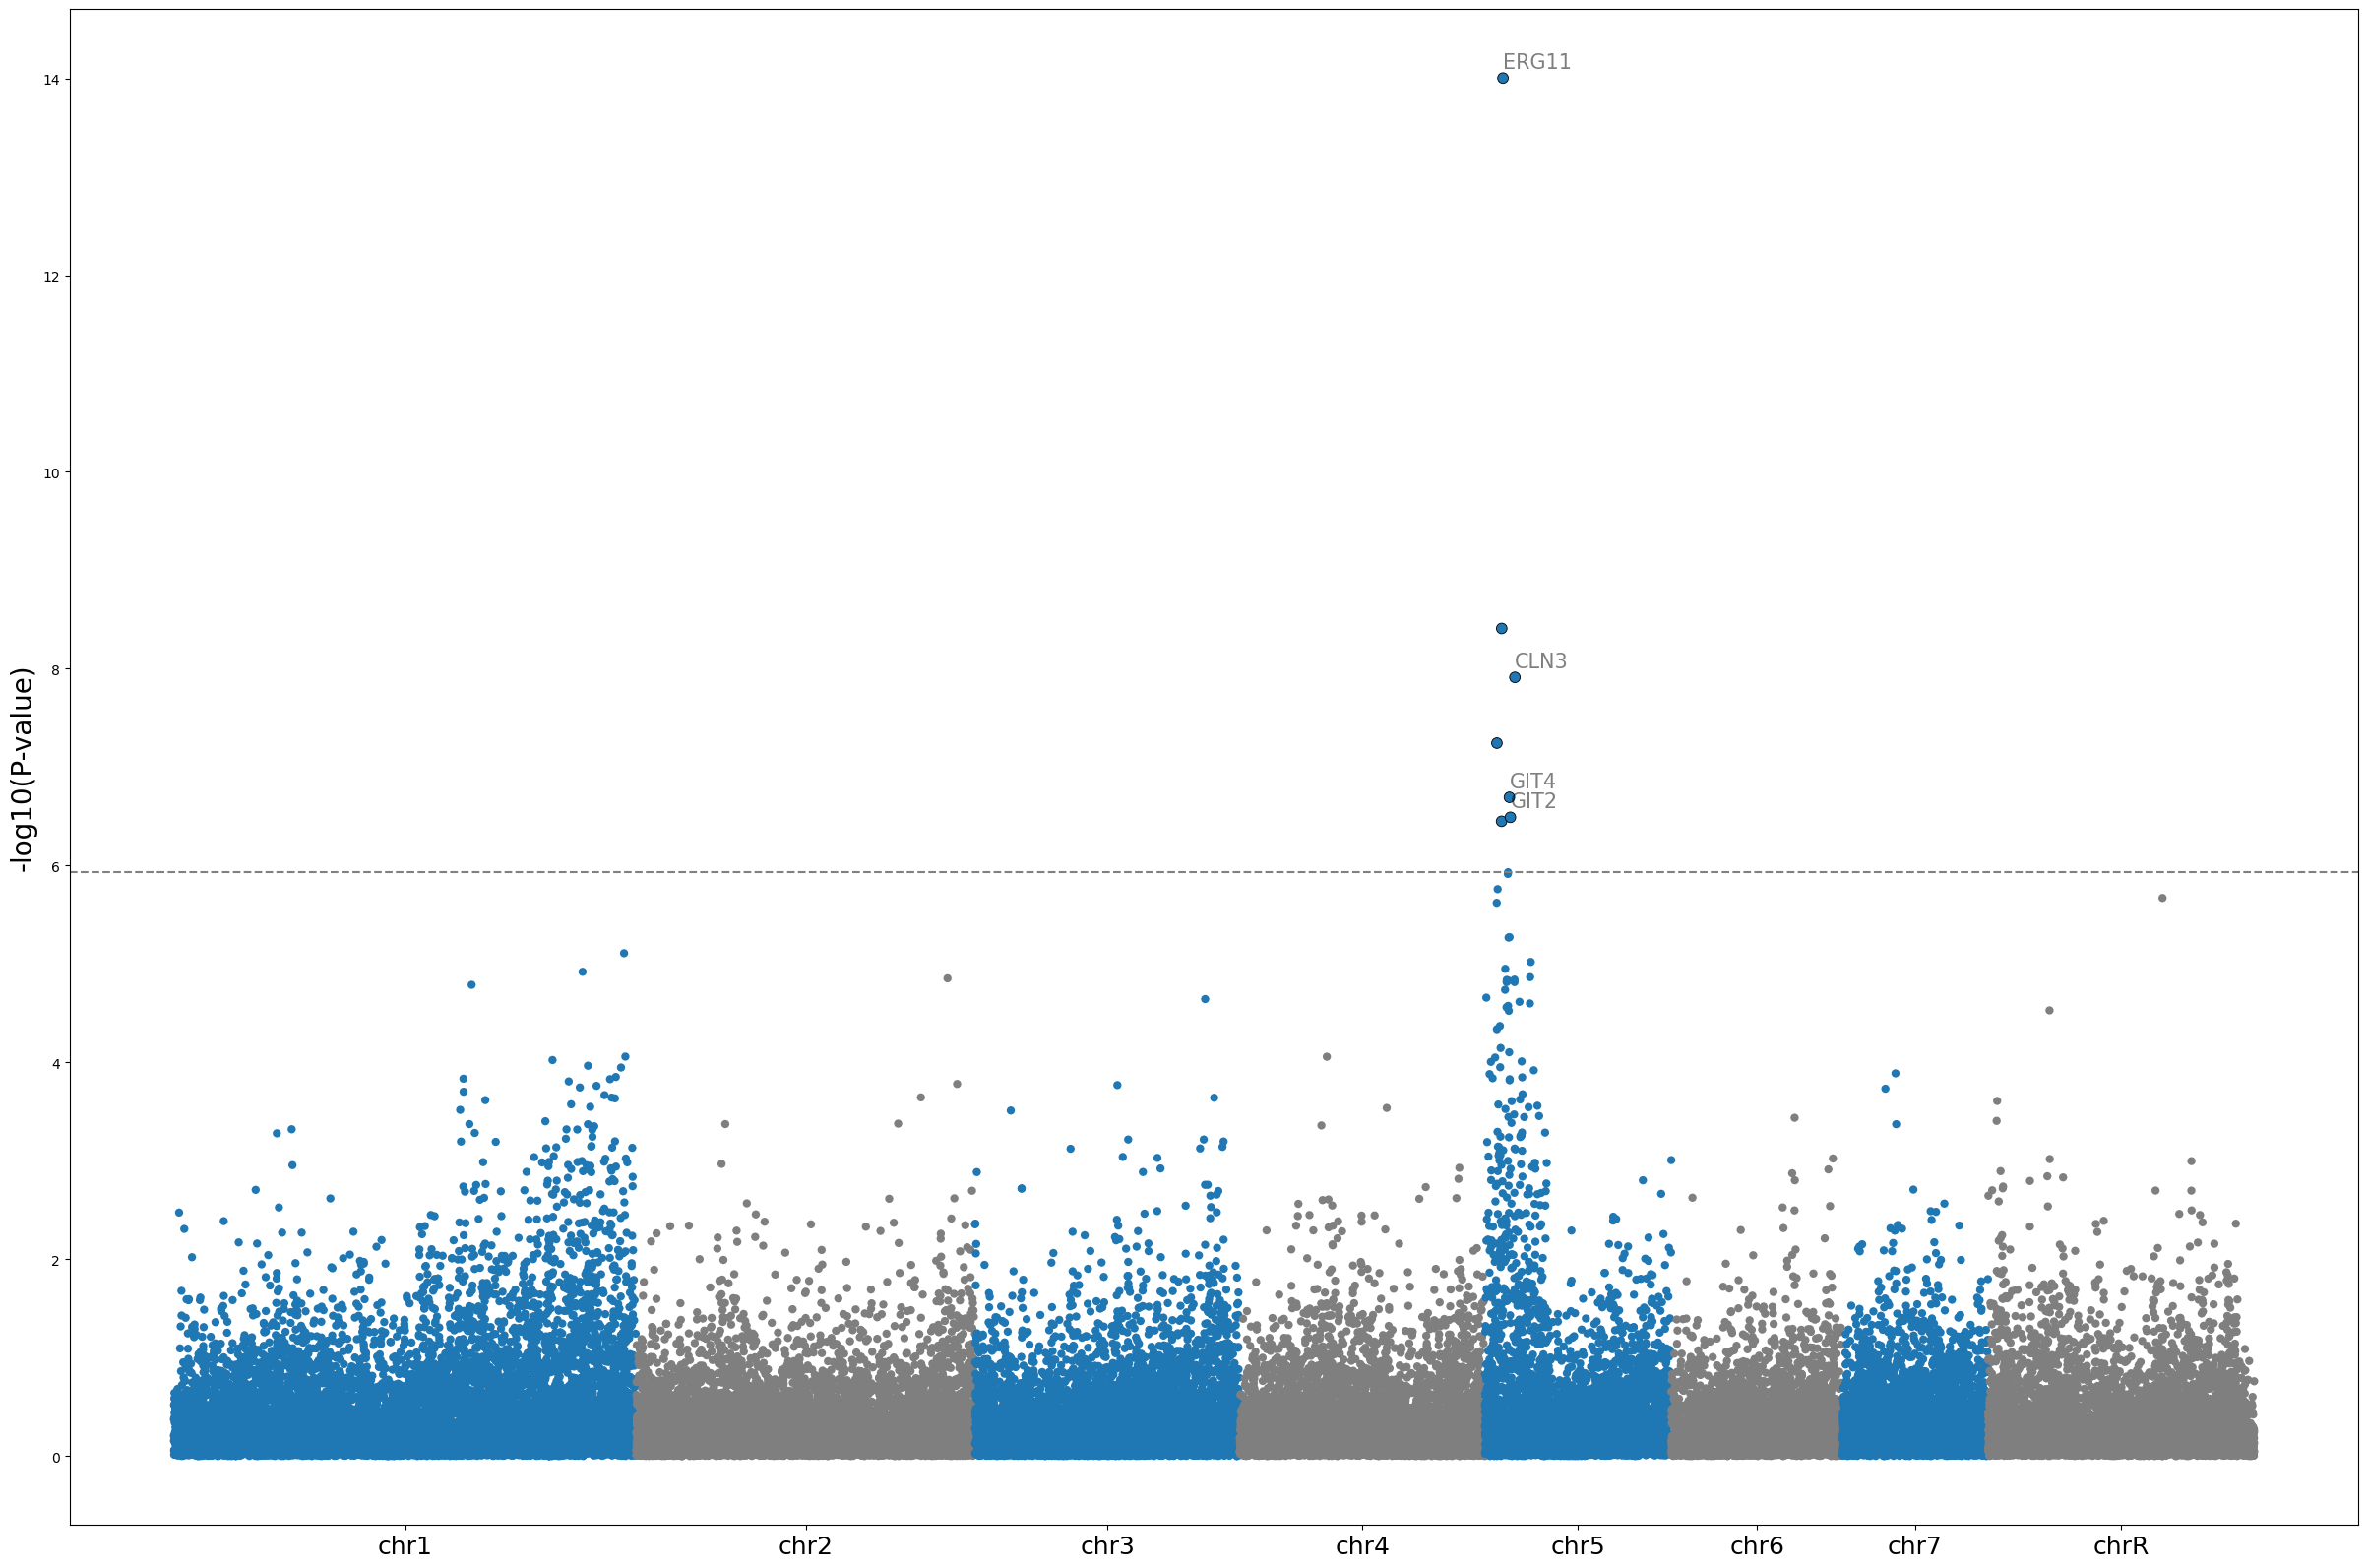

In [9]:
dmm['GENE_NAME'] = dmm['GENE_NAME'].apply(lambda x: str(x).replace('UNK',''))

fig = plotMP(dmm,threshold = t_log)
plt.savefig('22_05_run_gwas_plot_MAF5_genes.png', dpi=150)

In [10]:
def plotMP(dataframe, threshold=4):
    
    #threshold = 4
    fig, ax = plt.subplots(figsize = (30,7))
    sns.scatterplot(data = dataframe, x = 'loc', y = 'p_wald_log', hue = 'chr', palette = bi_palette, ec = "none", ax=ax)
    dmm_outliers = dataframe[dataframe['p_wald_log'] > threshold]
    sns.scatterplot(data = dmm_outliers, x = 'loc', y = 'p_wald_log', hue = 'chr', palette = bi_palette, 
                    s = 60, edgecolor = 'black', ax=ax)
    #for i in range(len(dmm_outliers['p_wald_log'].values)):
    #    plt.annotate(dmm_outliers['GENE_NAME'].values[i],
    #               (dmm_outliers['loc'].values[i], 
    #                  dmm_outliers['p_wald_log'].values[i] + 0.1), size = 15, alpha=0.5)
    ax.axhline(t_log, ls='--',c="grey")
    #ax.axhline(threshold, ls='--',c="lightgrey")
    ax.get_legend().remove()
    plt.xticks(dchr['midloc'], dchr['chrom'], fontsize=18)
    ax.set_xlabel("")
    ax.set_ylabel("-log10(P-value)", fontsize=20)
    return fig

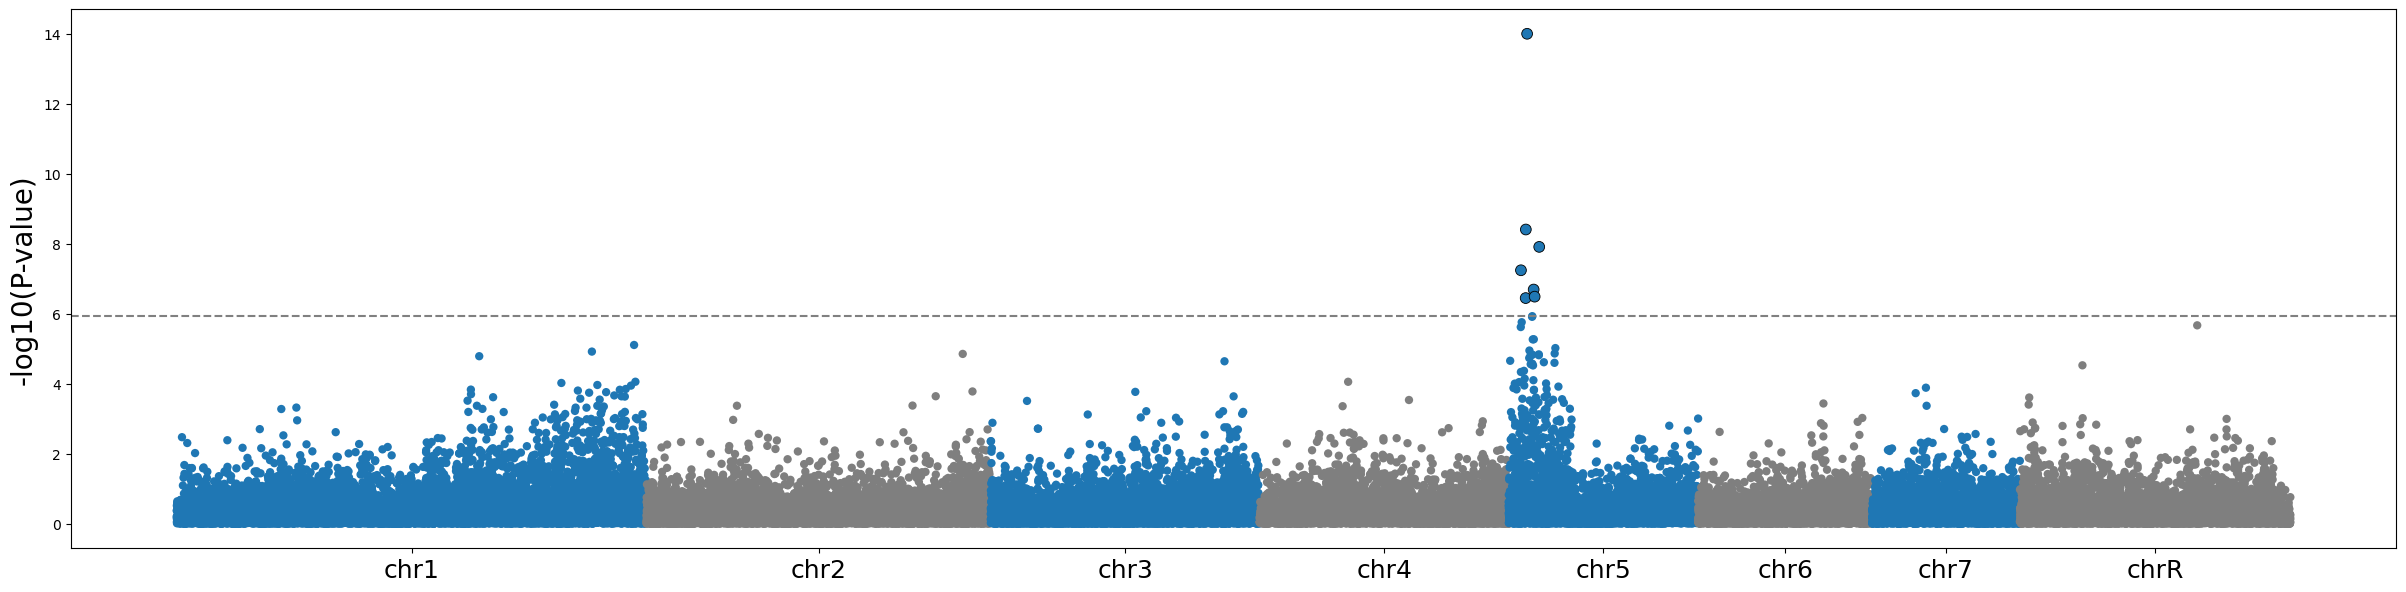

In [11]:
dmm['GENE_NAME'] = dmm['GENE_NAME'].apply(lambda x: str(x).replace('UNK',''))

fig = plotMP(dmm,threshold = t_log)
plt.savefig('22_05_run_gwas_plot_MAF5.png', dpi=150)